In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df['HasCrCard']=df['HasCrCard'].astype('object')
df['IsActiveMember']=df['IsActiveMember'].astype('object')
df['Exited']=df['Exited'].astype('object')

In [13]:
cat_df=df.select_dtypes('object')
cat_df.columns

Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

In [14]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [15]:
num_df=df.select_dtypes(np.number)
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [17]:
df.describe(include='object')

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,7055,5151,7963


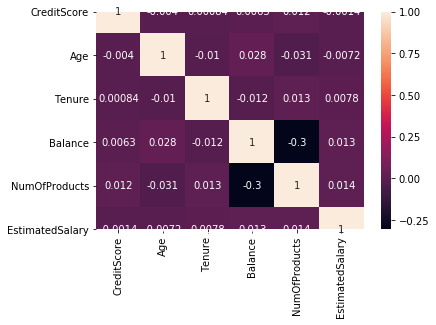

In [8]:
sns.heatmap(df.corr(),annot=True)

there is no strong correlation among variables so we can say that there is no multicollinearity

<Figure size 576x360 with 0 Axes>

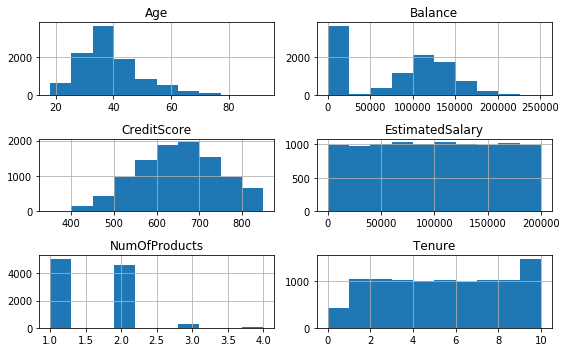

Skewness:


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [28]:

df.hist(figsize=(8,5))

plt.tight_layout()

plt.show()  


print('Skewness:')

df.skew()

In [30]:
Total = df.isnull().sum().sort_values(ascending=False)          


Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


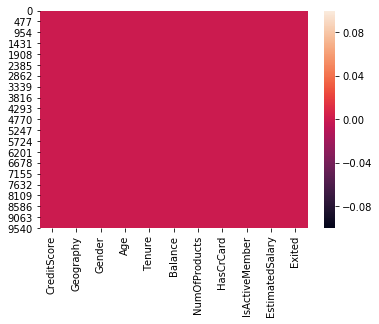

In [72]:
sns.heatmap(df.isnull())
plt.show()

In [34]:
print('% Values in each categorical columns')
for i in cat_df.columns:
    print('\n% Values in column ',i)
    print((df[i].value_counts()/len(df[i])*100))

% Values in each categorical columns

% Values in column  Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

% Values in column  Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64

% Values in column  HasCrCard
1    70.55
0    29.45
Name: HasCrCard, dtype: float64

% Values in column  IsActiveMember
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

% Values in column  Exited
0    79.63
1    20.37
Name: Exited, dtype: float64


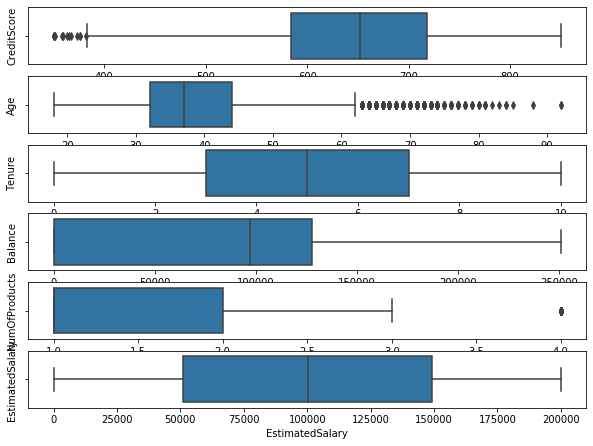

In [37]:
#outliers Checking
plt.figure(figsize=(10,20))
for i,col in enumerate(num_df,1):
    plt.subplot(16,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

# Categorical Column Analysis

In [42]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

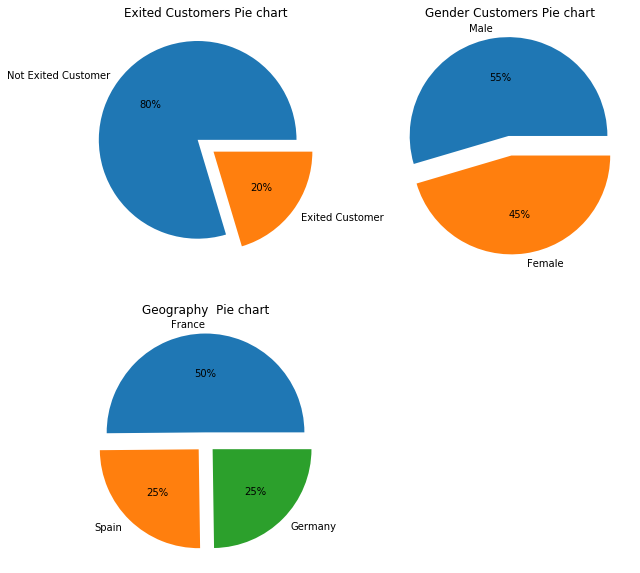

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Exited Customers Pie chart')
explode = (0.1,0.1)
plt.pie(df['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(2,2,2)
plt.title('Gender Customers Pie chart')
explode = (0.1,0.1)
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)
plt.subplot(2,2,3)
plt.title('Geography  Pie chart')
explode = (0.1,0.1,0.1)
plt.pie(df['Geography'].value_counts(),labels=['France','Spain','Germany'],autopct='%0.f%%',explode=explode)
plt.show()


- 20% of customers are exiting the bank and 80% are the reatined customers.
- Bank has total 55% male customers and 45% are feamle customers
- 50% of customers are from France Region,25% from Spain and 25% from Germany

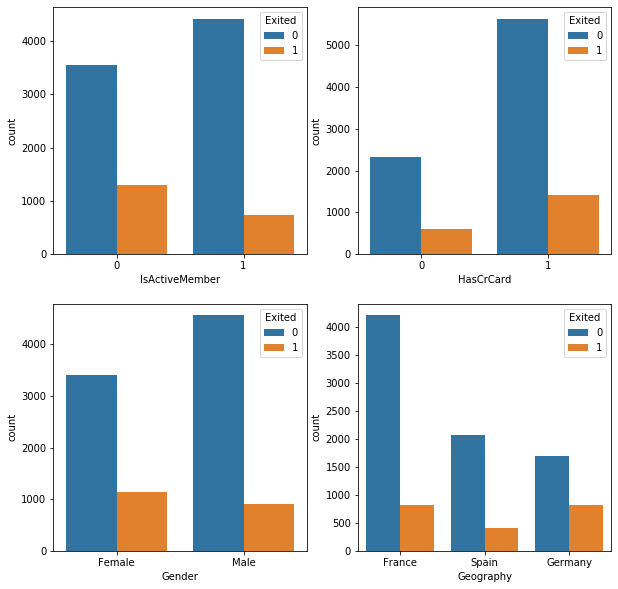

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df['IsActiveMember'],hue=df['Exited'])
plt.subplot(2,2,2)
sns.countplot(df['HasCrCard'],hue=df['Exited'])
plt.subplot(2,2,3)
sns.countplot(df['Gender'],hue=df['Exited'])
plt.subplot(2,2,4)
sns.countplot(df['Geography'],hue=df['Exited'])
plt.show()

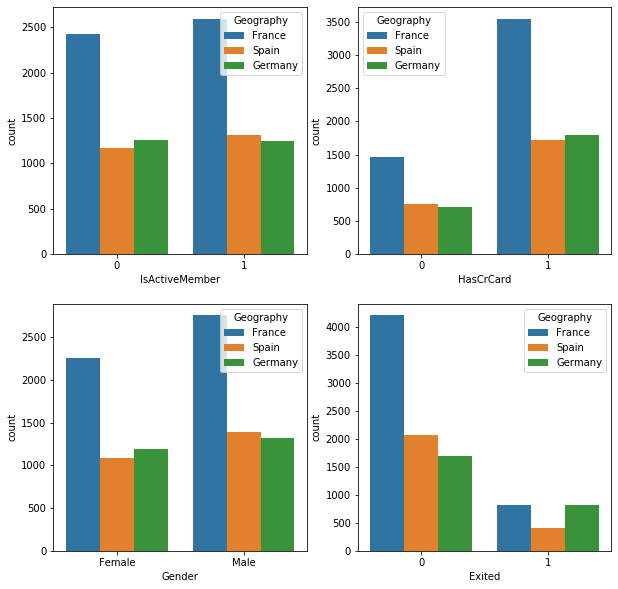

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df['IsActiveMember'],hue=df['Geography'])
plt.subplot(2,2,2)
sns.countplot(df['HasCrCard'],hue=df['Geography'])
plt.subplot(2,2,3)
sns.countplot(df['Gender'],hue=df['Geography'])
plt.subplot(2,2,4)
sns.countplot(df['Exited'],hue=df['Geography'])
plt.show()

In [46]:
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

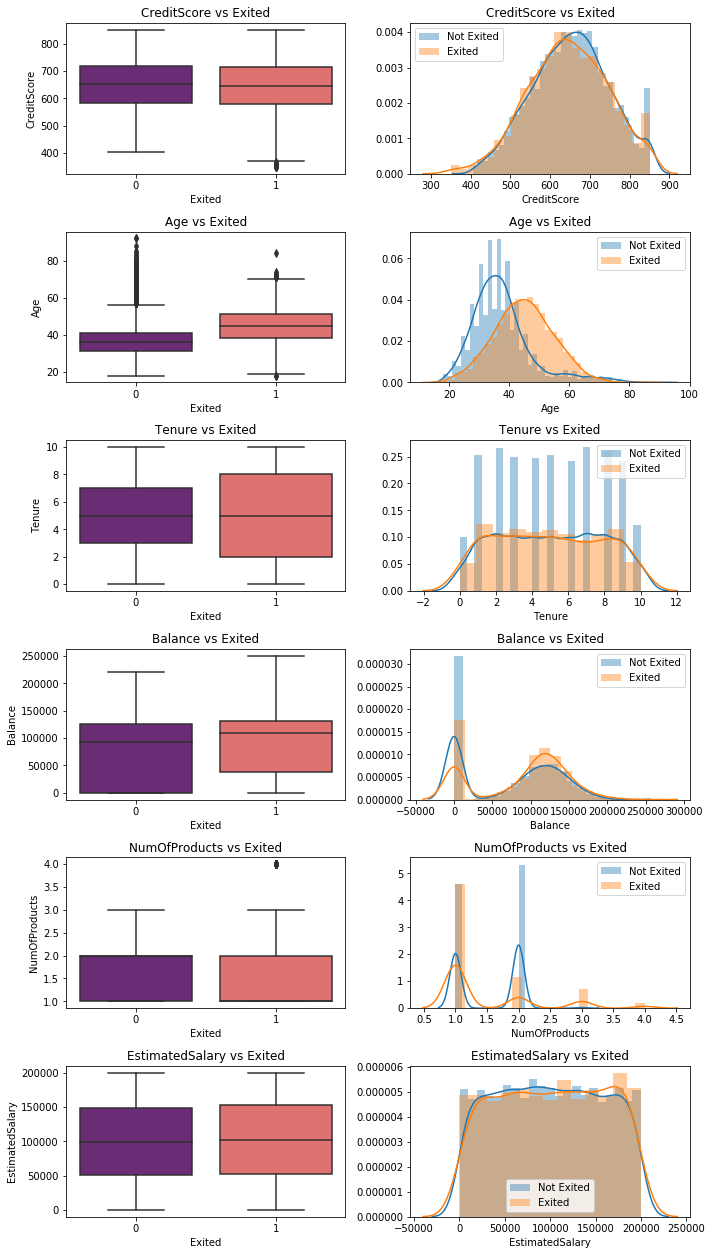

In [57]:

def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited')
    sns.boxplot(x=df['Exited'], y=df[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited')
    sns.distplot(df[x][df['Exited']==0],label='Not Exited')
    sns.distplot(df[x][df['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

#plot_count('enginelocation', 1)


m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


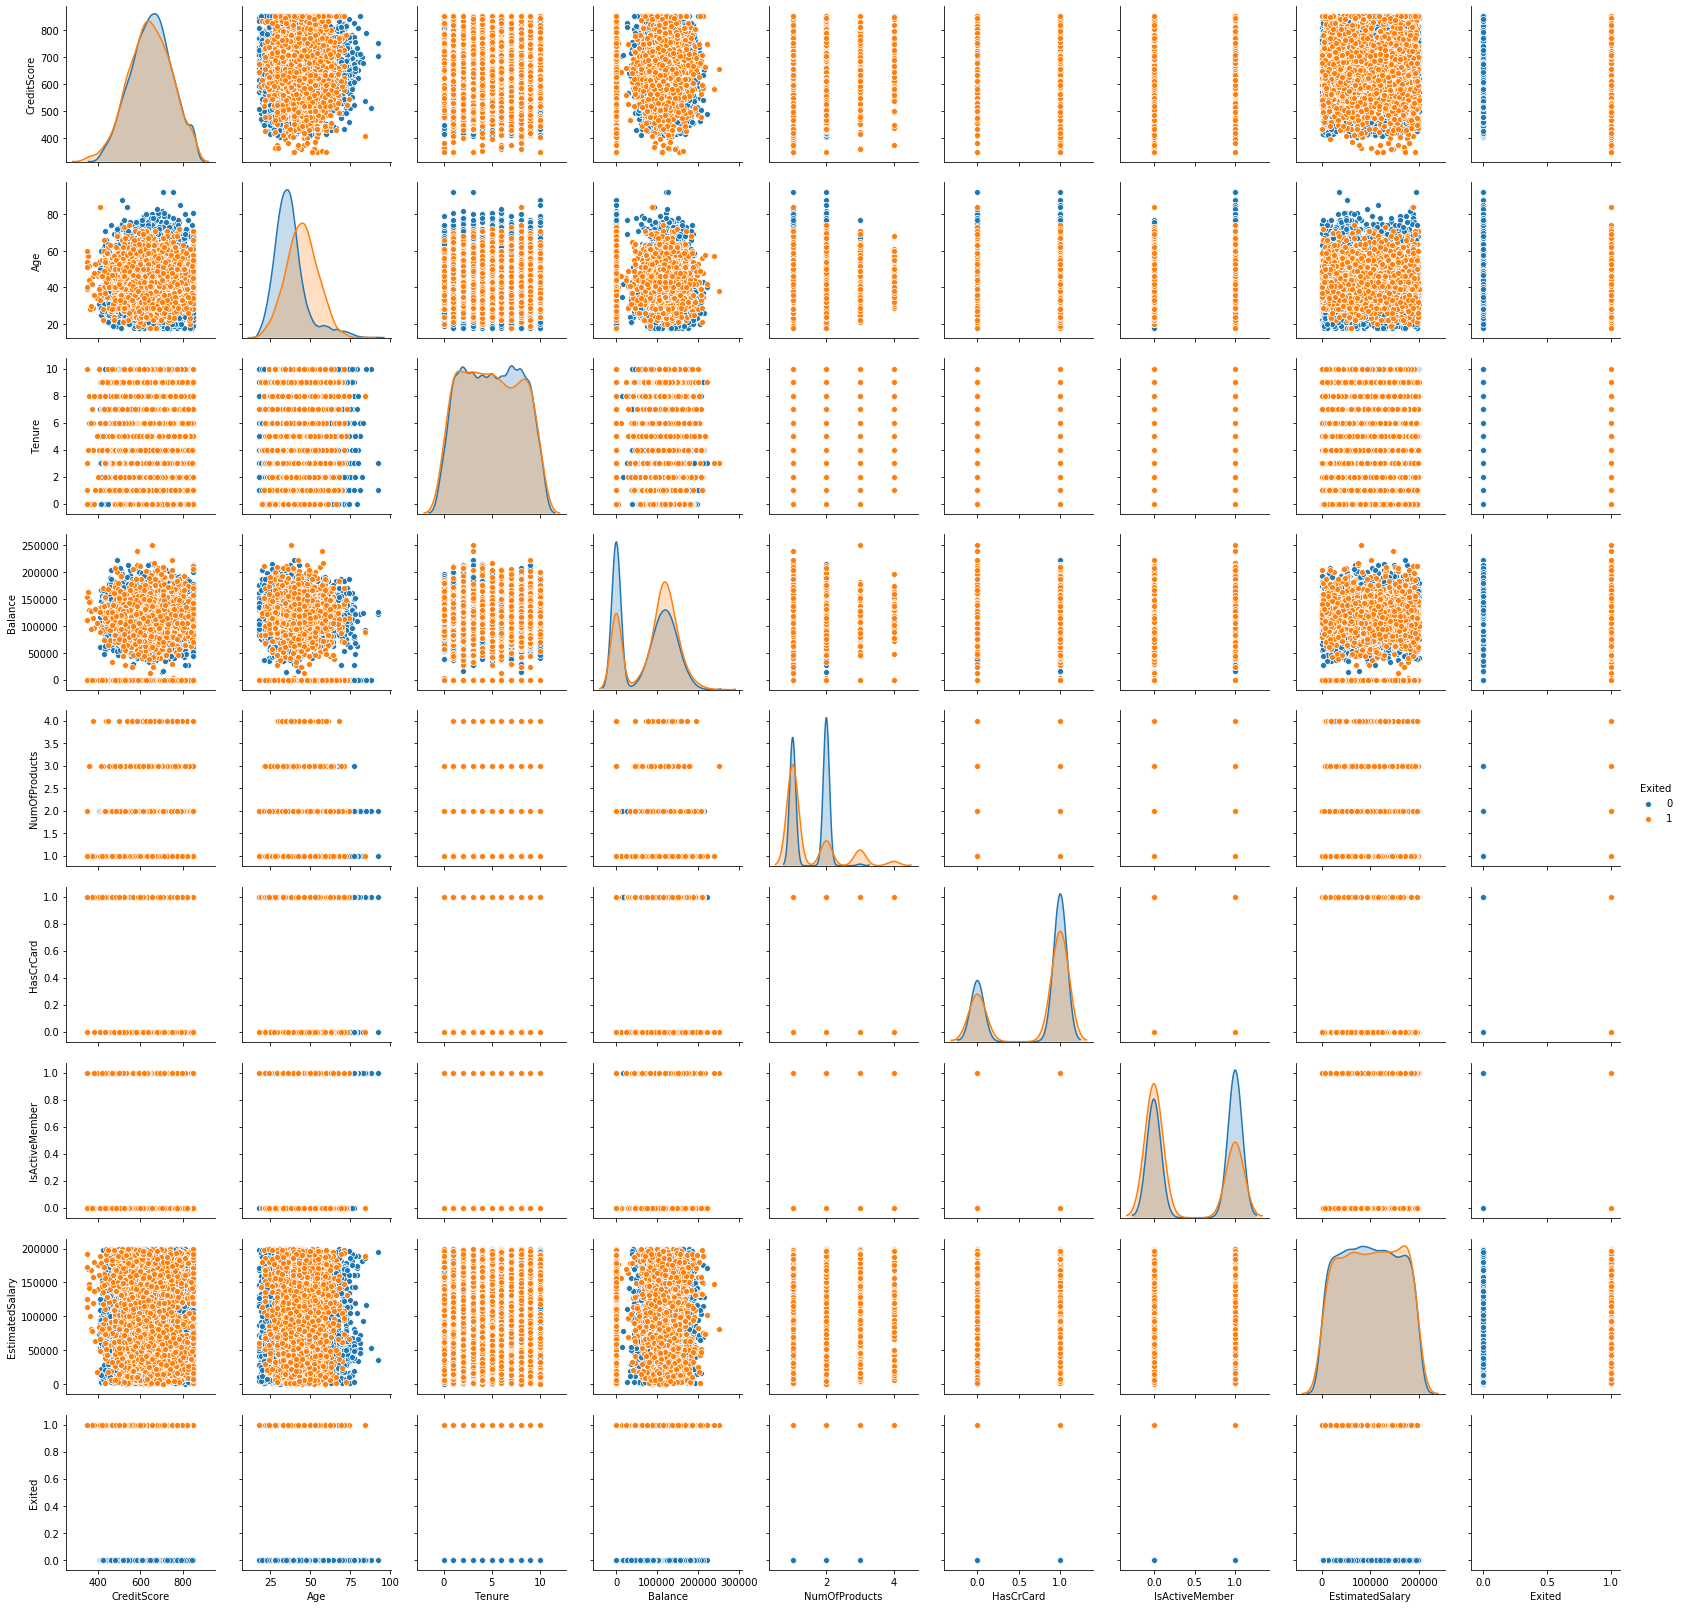

In [69]:
sns.pairplot(df,diag_kind='kde',hue='Exited')

# Statistical Tests

In [18]:
from scipy.stats import ttest_ind

In [19]:
df_churn=df[df['Exited']==1]
df_not_churn=df[df['Exited']==0]

In [64]:
for i in num_df.columns:
    _,pval=ttest_ind(df_churn[i],df_not_churn[i])
    print(i,pval)

CreditScore 0.006738213892192373
Age 1.2399313093427738e-186
Tenure 0.16152684949473256
Balance 1.2755633191525477e-32
NumOfProducts 1.717333004804293e-06
EstimatedSalary 0.22644042802223346


## Spliting Regionwise for better prediction

In [20]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [21]:
df_France.shape,df_Germany.shape,df_Spain.shape

((5014, 11), (2509, 11), (2477, 11))

In [22]:
from scipy.stats import f_oneway
for i in num_df.columns:
    _,pval=f_oneway(df_France[i],df_Germany[i],df_Spain[i])
    print(i,pval)

CreditScore 0.6707197151786737
Age 5.60622043878216e-06
Tenure 0.925249785691543
Balance 0.0
NumOfProducts 0.487955050430974
EstimatedSalary 0.5583736355799094


In [79]:
pd.crosstab(df['Exited'],df['Geography'],normalize=True)

Geography,France,Germany,Spain
Exited,,,
0,0.4204,0.1695,0.2064
1,0.0810,0.0814,0.0413


In [90]:
print('France Exited Proportion \n',df_France['Exited'].value_counts(normalize=True))
print('\n Germany Exited Proportion \n',df_Germany['Exited'].value_counts(normalize=True))
print('\n Spain Exited Proportion \n',df_Spain['Exited'].value_counts(normalize=True))

France Exited Proportion 
 0    0.838452
1    0.161548
Name: Exited, dtype: float64

 Germany Exited Proportion 
 0    0.675568
1    0.324432
Name: Exited, dtype: float64

 Spain Exited Proportion 
 0    0.833266
1    0.166734
Name: Exited, dtype: float64


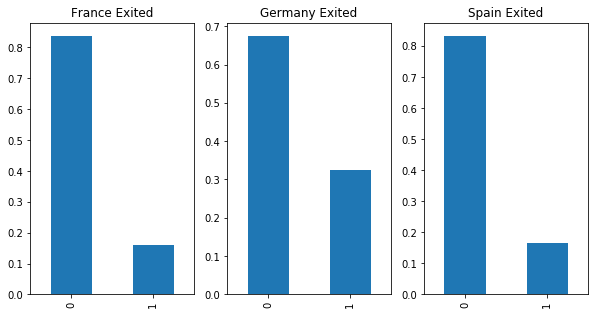

In [95]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('France Exited')
df_France['Exited'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,3,2)
plt.title('Germany Exited')
df_Germany['Exited'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,3,3)
plt.title('Spain Exited')
df_Spain['Exited'].value_counts(normalize=True).plot(kind='bar')


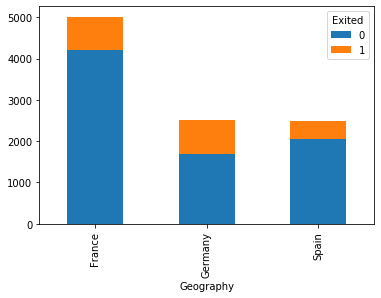

In [76]:
pd.crosstab(df['Geography'],df['Exited']).plot(kind='bar',stacked=True)

## Comparing male and Female Proportions in 3 regions

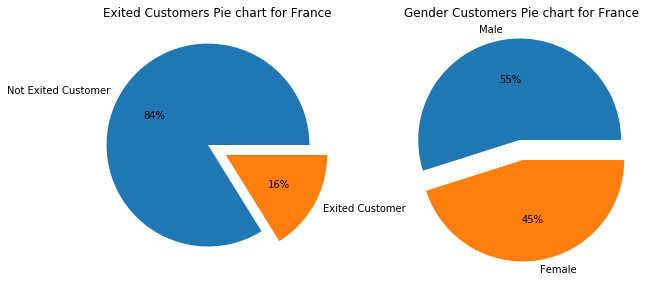

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for France')
explode = (0.1,0.1)
plt.pie(df_France['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for France')
explode = (0.1,0.1)
plt.pie(df_France['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

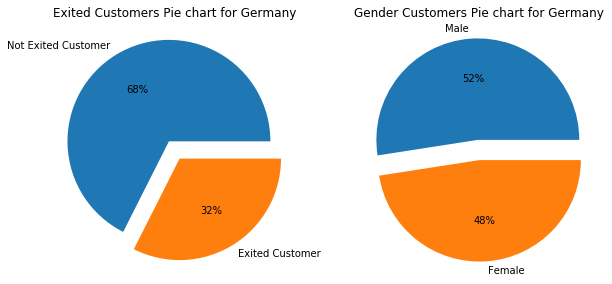

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for Germany')
explode = (0.1,0.1)
plt.pie(df_Germany['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for Germany')
explode = (0.1,0.1)
plt.pie(df_Germany['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

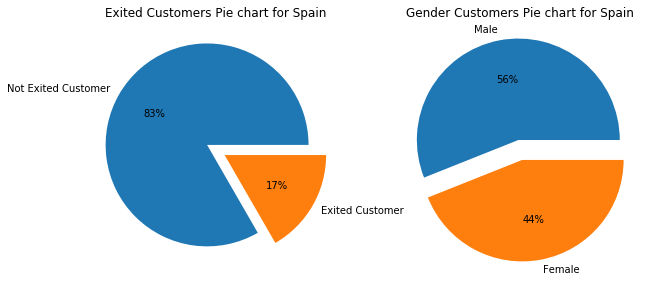

In [101]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for Spain')
explode = (0.1,0.1)
plt.pie(df_Spain['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for Spain')
explode = (0.1,0.1)
plt.pie(df_Spain['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

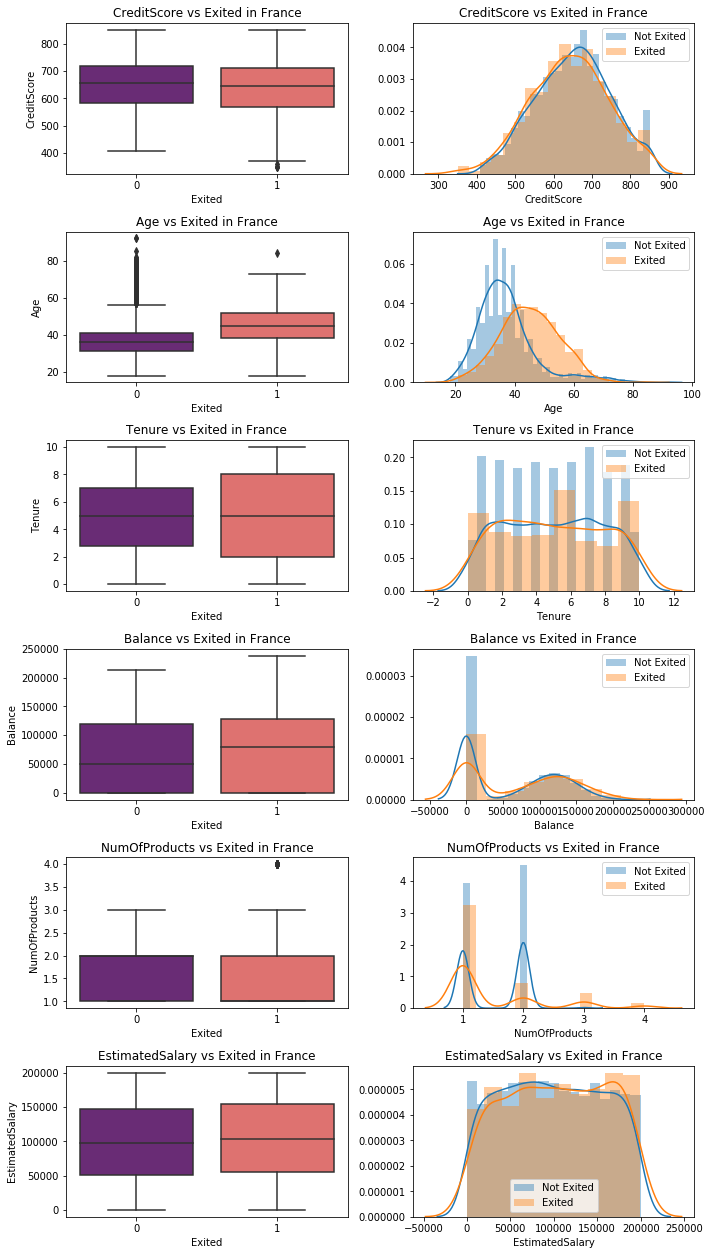

In [102]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in France')
    sns.boxplot(x=df_France['Exited'], y=df_France[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in France')
    sns.distplot(df_France[x][df_France['Exited']==0],label='Not Exited')
    sns.distplot(df_France[x][df_France['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

#plot_count('enginelocation', 1)


m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

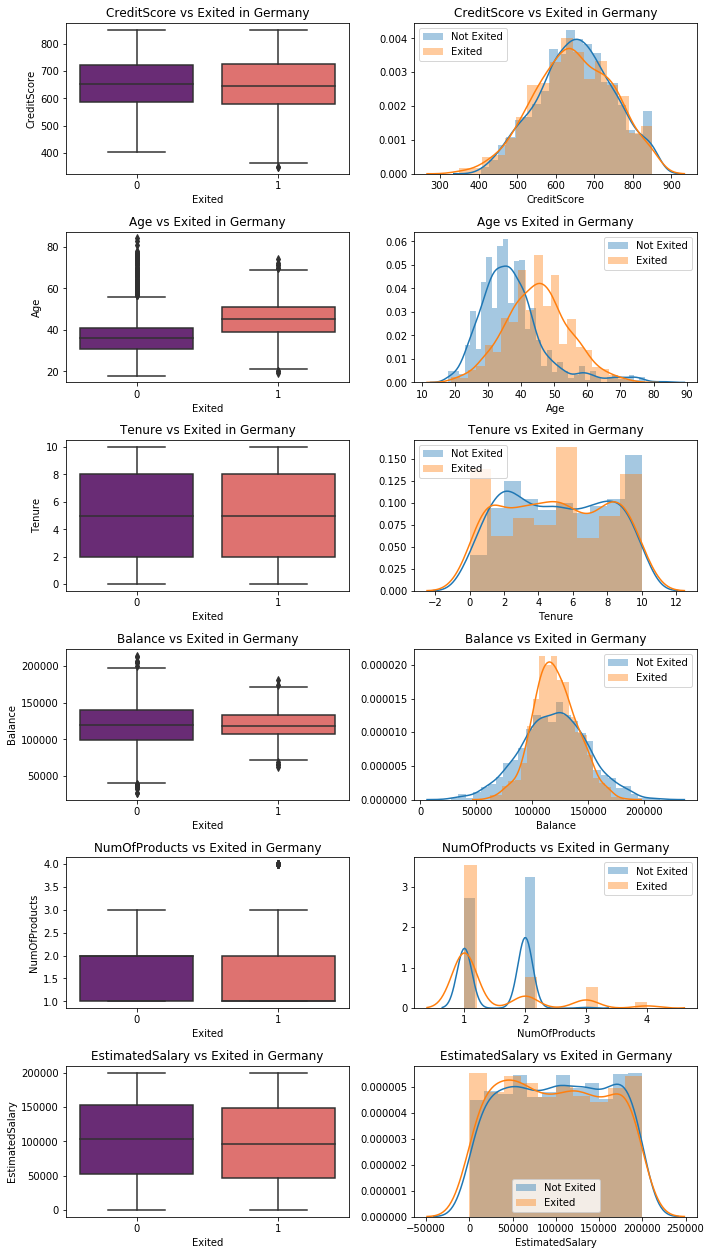

In [103]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in Germany')
    sns.boxplot(x=df_Germany['Exited'], y=df_Germany[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in Germany')
    sns.distplot(df_Germany[x][df_Germany['Exited']==0],label='Not Exited')
    sns.distplot(df_Germany[x][df_Germany['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

#plot_count('enginelocation', 1)


m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

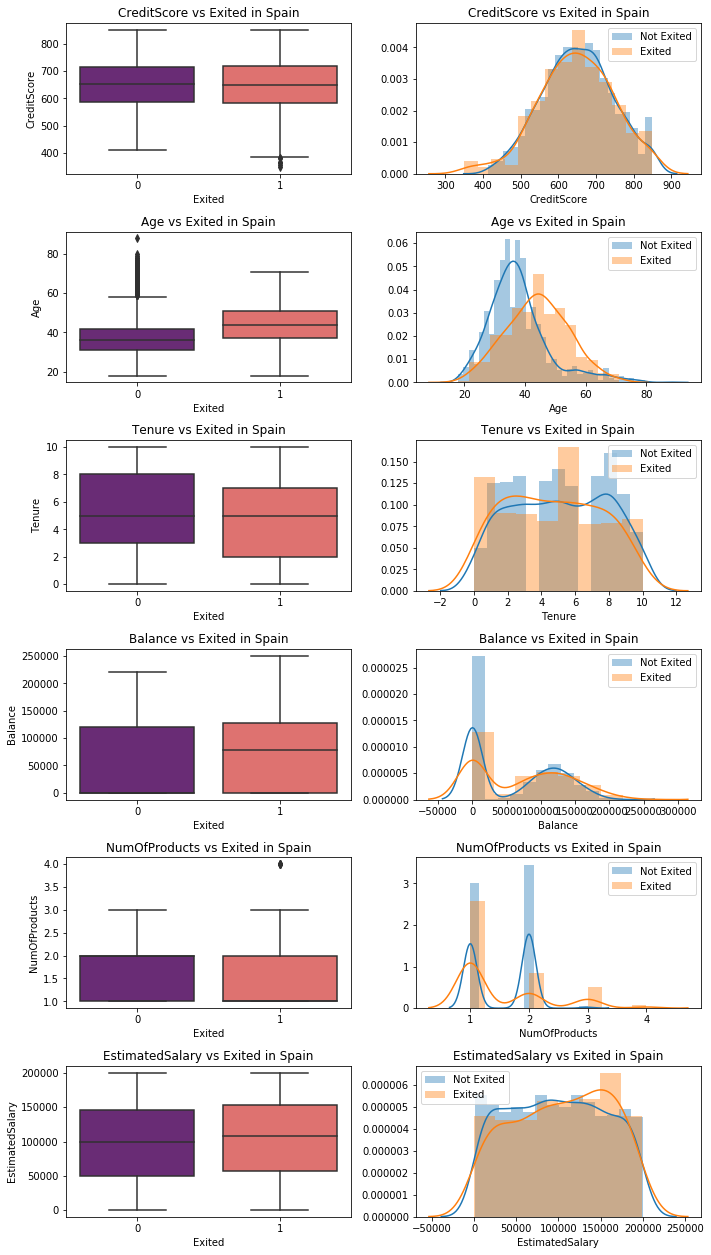

In [104]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in Spain')
    sns.boxplot(x=df_Spain['Exited'], y=df_Spain[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in Spain')
    sns.distplot(df_Spain[x][df_Spain['Exited']==0],label='Not Exited')
    sns.distplot(df_Spain[x][df_Spain['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

#plot_count('enginelocation', 1)


m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

# France Region

In [23]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype(np.number)

In [24]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [25]:
df_France.shape

(5014, 11)

In [109]:
df_France.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0
6,822,France,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0
8,501,France,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0


In [26]:
df_France=df_France.drop('Geography',axis=1)

In [27]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        5014 non-null int64
Gender             5014 non-null object
Age                5014 non-null int64
Tenure             5014 non-null int64
Balance            5014 non-null float64
NumOfProducts      5014 non-null int64
HasCrCard          5014 non-null float64
IsActiveMember     5014 non-null float64
EstimatedSalary    5014 non-null float64
Exited             5014 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 430.9+ KB


In [28]:
x=pd.get_dummies(df_France['Gender'],drop_first=True,prefix='Gender')
df_France['Gender_Male']=x

In [29]:
df_France=df_France.drop('Gender',axis=1)

In [30]:
df_France['Gender_Male']=df_France['Gender_Male'].astype('int')

In [31]:
df_France['Exited'].value_counts()

0.0    4204
1.0     810
Name: Exited, dtype: int64

In [32]:
y=df_France['Exited']
x=df_France.drop('Exited',axis=1)

## Checking Variable importance using Statistical Methods

In [33]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.382955
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 5014
Model:                          Logit   Df Residuals:                     5004
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Feb 2021   Pseudo R-squ.:                  0.1340
Time:                        18:15:03   Log-Likelihood:                -1920.1
converged:                       True   LL-Null:                       -2217.3
Covariance Type:            nonrobust   LLR p-value:                3.353e-122
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5622      0.362     -9.850      0.000      -4.271      -2.853
CreditScore        -0.0010      0.000     -2.401      0.016      -0.002      -0.000
Age                 0.0757      0.004     19.822      0.000       0.068       0.083
Tenure             -0.0014      0.014     -0.100      0.921      -0.029       0.026
Balance            2.8e-06   6.82e-07      4.109      0.000    1.46e-06    4.14e-06
NumOfProducts      -0.0654      0.074     -0.879      0.379      -0.211       0.080
HasCrCard           0.0069      0.090      0.076      0.939      -0.170       0.184
IsActiveMember     -1.0755      0.089    -12.075      0.000      -1.250      -0.901
EstimatedSalary  1.701e-06   7.25e-07      2.346      0.019     2.8e-07    3.12e-06
Gender_Male        -0.5944      0.083     -7.176      0.000      -0.757      -0.432
===================================================================================
"""

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['VIF'])

,VIF
const,80.195448
CreditScore,1.002306
Age,1.013138
Tenure,1.001632
Balance,1.193985
NumOfProducts,1.194761
HasCrCard,1.002196
IsActiveMember,1.013914
EstimatedSalary,1.002233
Gender_Male,1.002219


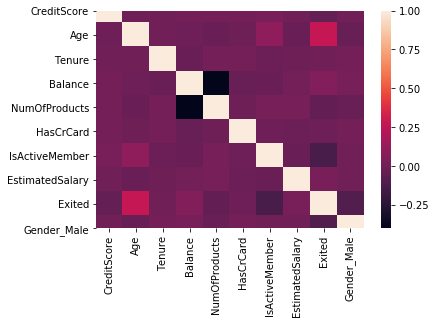

In [120]:
sns.heatmap(df_France.corr())
plt.show()

## Checking variable importance using Machine Learning

In [121]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.227394
7,EstimatedSalary,0.169654
0,CreditScore,0.153514
3,Balance,0.145822
4,NumOfProducts,0.124254
2,Tenure,0.074943
6,IsActiveMember,0.060800
8,Gender_Male,0.024328
5,HasCrCard,0.019290


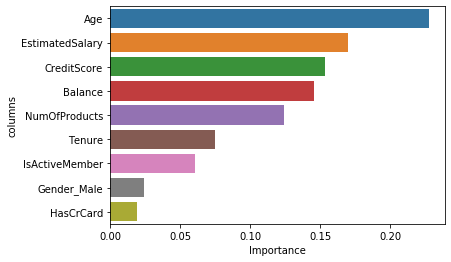

In [122]:
sns.barplot(imp['Importance'],imp['columns'])

# Germany Region

In [123]:
df_Germany.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,Germany,Male,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,Germany,Male,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,Germany,Female,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [124]:
df_Germany.shape

(2509, 11)

In [125]:
df_Germany['Exited'].value_counts()

0.0    1695
1.0     814
Name: Exited, dtype: int64

In [126]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 11 columns):
CreditScore        2509 non-null int64
Geography          2509 non-null object
Gender             2509 non-null object
Age                2509 non-null int64
Tenure             2509 non-null int64
Balance            2509 non-null float64
NumOfProducts      2509 non-null int64
HasCrCard          2509 non-null float64
IsActiveMember     2509 non-null float64
EstimatedSalary    2509 non-null float64
Exited             2509 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 235.2+ KB


In [127]:
df_Germany=df_Germany.drop('Geography',axis=1)

In [128]:
male_german=pd.get_dummies(df_Germany['Gender'],drop_first=True,prefix='Gender')

In [129]:

df_Germany=df_Germany.drop('Gender',axis=1)

In [130]:
df_Germany['Gender_Male']=male_german

In [131]:
x=df_Germany.drop('Exited',axis=1)
y=df_Germany['Exited']

In [132]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.544766
         Iterations 6


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 2509
Model:                          Logit   Df Residuals:                     2499
Method:                           MLE   Df Model:                            9
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.1355
Time:                        20:31:58   Log-Likelihood:                -1366.8
converged:                       True   LL-Null:                       -1581.1
Covariance Type:            nonrobust   LLR p-value:                 1.110e-86
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.6913      0.473     -5.686      0.000      -3.619      -1.764
CreditScore        -0.0002      0.000     -0.503      0.615      -0.001       0.001
Age                 0.0760      0.005     16.043      0.000       0.067       0.085
Tenure             -0.0096      0.016     -0.602      0.547      -0.041       0.022
Balance          1.406e-06   1.77e-06      0.797      0.426   -2.05e-06    4.87e-06
NumOfProducts      -0.2056      0.075     -2.735      0.006      -0.353      -0.058
HasCrCard          -0.0232      0.103     -0.224      0.823      -0.226       0.179
IsActiveMember     -0.9525      0.096     -9.888      0.000      -1.141      -0.764
EstimatedSalary -1.395e-06   8.03e-07     -1.737      0.082   -2.97e-06    1.79e-07
Gender_Male        -0.4133      0.094     -4.416      0.000      -0.597      -0.230
===================================================================================
"""

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns)

,0
const,99.867816
CreditScore,1.005749
Age,1.004700
Tenure,1.007007
Balance,1.003676
NumOfProducts,1.003247
HasCrCard,1.006038
IsActiveMember,1.010679
EstimatedSalary,1.002214
Gender_Male,1.006189


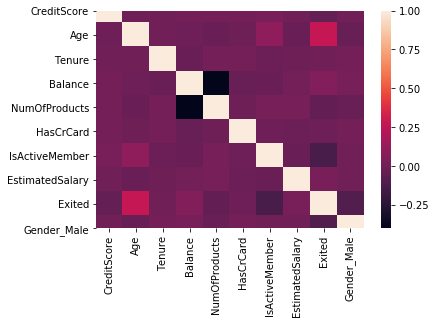

In [134]:
sns.heatmap(df_France.corr())
plt.show()

In [135]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.259099
3,Balance,0.177643
7,EstimatedSalary,0.138081
4,NumOfProducts,0.137957
0,CreditScore,0.134172
2,Tenure,0.071394
6,IsActiveMember,0.046376
8,Gender_Male,0.019478
5,HasCrCard,0.015799


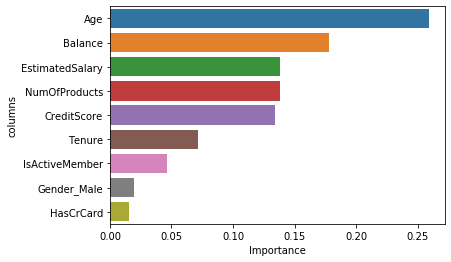

In [136]:
sns.barplot(imp['Importance'],imp['columns'])

# Spain Region

In [137]:
df_Spain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0.0
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0.0
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1.0
11,497,Spain,Male,24,3,0.00,2,1.0,0.0,76390.01,0.0
14,635,Spain,Female,35,7,0.00,2,1.0,1.0,65951.65,0.0


In [138]:
df_Spain['Exited'].value_counts()

0.0    2064
1.0     413
Name: Exited, dtype: int64

In [139]:
df_Spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 9992
Data columns (total 11 columns):
CreditScore        2477 non-null int64
Geography          2477 non-null object
Gender             2477 non-null object
Age                2477 non-null int64
Tenure             2477 non-null int64
Balance            2477 non-null float64
NumOfProducts      2477 non-null int64
HasCrCard          2477 non-null float64
IsActiveMember     2477 non-null float64
EstimatedSalary    2477 non-null float64
Exited             2477 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 232.2+ KB


In [140]:
df_Spain=df_Spain.drop('Geography',axis=1)

In [141]:
male_spain=pd.get_dummies(df_Spain['Gender'],drop_first=True,prefix='Gender')

In [142]:
df_Spain=df_Spain.drop('Gender',axis=1)

In [143]:
df_Spain['Gender_Male']=male_spain

In [144]:
x=df_Spain.drop('Exited',axis=1)
y=df_Spain['Exited']

In [145]:
import statsmodels.api  as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.394652
         Iterations 7


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 2477
Model:                          Logit   Df Residuals:                     2467
Method:                           MLE   Df Model:                            9
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.1243
Time:                        20:34:29   Log-Likelihood:                -977.55
converged:                       True   LL-Null:                       -1116.3
Covariance Type:            nonrobust   LLR p-value:                 1.521e-54
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9758      0.521     -5.716      0.000      -3.996      -1.956
CreditScore        -0.0007      0.001     -1.076      0.282      -0.002       0.001
Age                 0.0647      0.005     11.971      0.000       0.054       0.075
Tenure             -0.0544      0.020     -2.679      0.007      -0.094      -0.015
Balance          3.397e-06   9.42e-07      3.605      0.000    1.55e-06    5.24e-06
NumOfProducts       0.0162      0.105      0.154      0.878      -0.190       0.223
HasCrCard          -0.1418      0.123     -1.152      0.249      -0.383       0.100
IsActiveMember     -1.2676      0.126    -10.092      0.000      -1.514      -1.021
EstimatedSalary  1.192e-06   1.01e-06      1.176      0.239   -7.94e-07    3.18e-06
Gender_Male        -0.5827      0.115     -5.045      0.000      -0.809      -0.356
===================================================================================
"""

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns)

,0
const,86.004919
CreditScore,1.002289
Age,1.019231
Tenure,1.005091
Balance,1.189241
NumOfProducts,1.193676
HasCrCard,1.003884
IsActiveMember,1.015476
EstimatedSalary,1.002215
Gender_Male,1.005387


In [147]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.204358
3,Balance,0.165073
0,CreditScore,0.163928
7,EstimatedSalary,0.163903
4,NumOfProducts,0.122018
2,Tenure,0.071749
6,IsActiveMember,0.071632
8,Gender_Male,0.021835
5,HasCrCard,0.015503


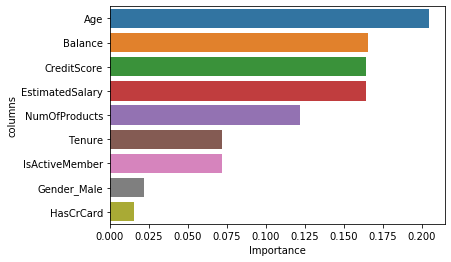

In [148]:
sns.barplot(imp['Importance'],imp['columns'])